In [4]:
import pandas as pd

In [5]:
import os
os.getcwd()

'C:\\Users\\Andy\\Documents\\Ironhack\\Labs\\Week1\\lab-customer-analysis-round-3'

In [6]:
marketing_customers = pd.read_csv('files_for_lab//csv_files//marketing_customer_analysis.csv')

In [7]:
marketing_customers.shape

(9134, 24)

In [91]:
# remove Unnamed: 0
# marketing_customers = marketing_customers.drop(columns=['Unnamed: 0'])

# drop to lower case
marketing_customers.columns = list(map(lambda x:x.lower(),marketing_customers.columns))

# replace spaces with _
#marketing_customers.columns = marketing_customers.columns.apply(lambda x : x.replace(' ','_'))
marketing_customers.columns = list(map(lambda x:x.replace(' ','_'),marketing_customers.columns))

# set 'effective_to_date' to date type
marketing_customers['effective_to_date'] = pd.to_datetime(marketing_customers['effective_to_date'])

In [92]:
marketing_customers.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [10]:
summary = pd.concat([marketing_customers.isna().sum(), round(marketing_customers.isna().sum()/len(marketing_customers),4)*100 ],axis=1)
summary = summary.set_axis(['Null Volumes','Null %'], axis=1)

summary[summary['Null Volumes']>0]


,Null Volumes,Null %


## Actions to take:

#### State - delete or set to unknown
#### Response - delete or set to unknown

#### Months since last claim - ***not checked, though likely set to 0 or an average***
#### Number of open complaints - ***not check, though likely set to 0 or an average***

#### Vehicle class - set nulls to 'Four-Door Car'
#### Vehicle size - set nulls to 'Medsize'

#### Vehicle type - keep but be mindful that it is 50% null values

In [11]:
# actions for handling nulls

# delete    df = df[<filter>]
#marketing_customers = marketing_customers[marketing_customers['state'].isna()==False]
#marketing_customers = marketing_customers[marketing_customers['state']!='Unknown']
#above would also apply to resposne anyway

# fill in another value    .fillna(<value>)
marketing_customers['state'] = marketing_customers['state'].fillna('Unknown')
marketing_customers['response'] = marketing_customers['response'].fillna('Unknown')

#marketing_customers['months since last claim'] = marketing_customers['months since last claim'].fillna(0)
#marketing_customers['number of open complaints'] = marketing_customers['number of open complaints'].fillna(0)
# or
marketing_customers['months since last claim'] = marketing_customers['months since last claim'].fillna(marketing_customers['months since last claim'].mean())
marketing_customers['number of open complaints'] = marketing_customers['number of open complaints'].fillna(marketing_customers['number of open complaints'].mean())

marketing_customers['vehicle class'] = marketing_customers['vehicle class'].fillna('Four-Door Car')
marketing_customers['vehicle size'] = marketing_customers['vehicle size'].fillna('Medsize')





In [12]:
pd.set_option('max_columns',25)
print("-----state-----")
print(marketing_customers['state'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['state'].isna()])))
print("")
#marketing_customers[marketing_customers['state'].isna() & marketing_customers['response'].isna()]

# When state is null response is also null

-----state-----
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
Null count: 0



In [13]:
pd.set_option('max_columns',25)
print("-----response-----")
print(marketing_customers['response'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['response'].isna()])))
print("")


-----response-----
No     7826
Yes    1308
Name: response, dtype: int64
Null count: 0



In [14]:
pd.set_option('max_columns',25)
print("-----months since last claim-----")
print(marketing_customers['months since last claim'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['months since last claim'].isna()])))
print("")
print(len(marketing_customers[marketing_customers['months since last claim'].isna()]))
print(len(marketing_customers[marketing_customers['months since last claim'].isna() & marketing_customers['number of open complaints'].isna()]))

# When 'months since last claim' is null 'number of open complaints' is also null

-----months since last claim-----
3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months since last claim, dtype: int64
Null count: 0

0
0


In [15]:
pd.set_option('max_columns',25)
print("-----vehicle class-----")
print(marketing_customers['vehicle class'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['vehicle class'].isna()])))
print("")
print(len(marketing_customers[marketing_customers['vehicle class'].isna()]))
print(len(marketing_customers[marketing_customers['vehicle class'].isna() & marketing_customers['vehicle size'].isna()]))

# When 'vehicle class' is null 'vehcile size' is also null

-----vehicle class-----
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle class, dtype: int64
Null count: 0

0
0


In [16]:
pd.set_option('max_columns',25)
print("-----vehicle size-----")
print(marketing_customers['vehicle size'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['vehicle size'].isna()])))
print("")

-----vehicle size-----
Medsize    6424
Small      1764
Large       946
Name: vehicle size, dtype: int64
Null count: 0



In [17]:
effdate = pd.to_datetime(marketing_customers['effective to date'])

In [18]:
effdate

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective to date, Length: 9134, dtype: datetime64[ns]

In [19]:
# example: df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]

#marketing_customers['effective to date'] = pd.to_datetime(marketing_customers['effective to date'])
#marketing_customers.dtypes

marketing_customers[(marketing_customers['effective to date']>='2011-01-01') & (marketing_customers['effective to date'] < '2011-03-01')]
#print(marketing_customers['effective to date'].min())
#print(marketing_customers['effective to date'].max())

# data effectively already filter to first quarter as only jan/feb exist.

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size


###
### Start of Round 3, ding ding!
###

In [20]:
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

#show dataframe info
display(marketing_customers.head())
marketing_customers.dtypes

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

In [21]:
#describe dataframe
display(marketing_customers.describe().T)
display(marketing_customers.describe(include=[object]).T) # the waning for np.object advised it was 
                                                          # deprecated and stated to just use object
#marketing_customers.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


,count,unique,top,freq
customer,9134,9134,QR15857,1
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
effective to date,9134,59,1/10/11,195
employmentstatus,9134,5,Employed,5698
gender,9134,2,F,4658
location code,9134,3,Suburban,5779
marital status,9134,3,Married,5298


In [22]:
# Show a plot of the total number of responses.
# Show a plot of the response rate by the sales channel.
# Show a plot of the response rate by the total claim amount.
# Show a plot of the response rate by income.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='response', ylabel='count'>

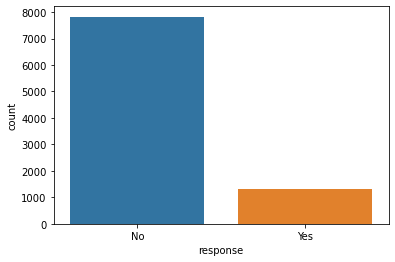

In [39]:
sns.countplot(x='response', data=marketing_customers)
#sns.barplot(x=marketing_customers.response.value_counts().index, y=marketing_customers.response.value_counts())

In [58]:
marketing_customers.sales_channel.value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [63]:
## group response rate by sales channel

# count the yes responses in each channel and devide by total responses in each channel
#marketing_customers['response_positive'] = marketing_customers['response']=='Yes'
marketing_customers['response_valid'] = marketing_customers['response'].isin(['Yes','No'])


<AxesSubplot:xlabel='sales_channel', ylabel='response_rates'>

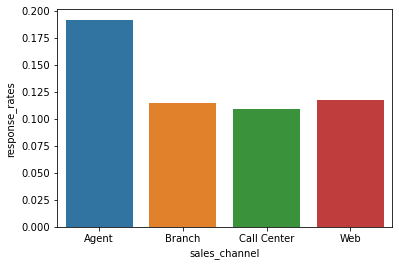

In [82]:
response_rates_by_sales_channel = marketing_customers.groupby("sales_channel")["response_positive"].sum()/marketing_customers.groupby("sales_channel")["response_valid"].sum()
response_rates_by_sales_channel = pd.DataFrame(response_rates_by_sales_channel, columns=['response_rates'])
response_rates_by_sales_channel
sns.barplot(x=response_rates_by_sales_channel.index, y=response_rates_by_sales_channel.response_rates)

In [85]:
response_rates_by_state = marketing_customers.groupby("state")["response_positive"].sum()/marketing_customers.groupby("state")["response_valid"].sum()
response_rates_by_state = pd.DataFrame(response_rates_by_state, columns=['response_rates'])


,response_rates
state,
Arizona,0.142689
California,0.144762
Nevada,0.140590
Oregon,0.144560
Washington,0.136591


In [98]:
response_rates_by_num_of_policies = marketing_customers.groupby("number_of_policies")["response_positive"].sum()/marketing_customers.groupby("number_of_policies")["response_valid"].sum()
response_rates_by_num_of_policies = pd.DataFrame(response_rates_by_num_of_policies, columns=['response_rates'])
response_rates_by_num_of_policies


,response_rates
number_of_policies,
1,0.158720
2,0.149085
3,0.113014
4,0.102689
5,0.147420
6,0.112903
7,0.138568
8,0.109375
9,0.173077


In [96]:
print(marketing_customers.groupby("number_of_policies")["total_claim_amount"].mean())
print(marketing_customers.groupby("number_of_policies")["total_claim_amount"].median())

#marketing_customers.effective_to_date.value_counts()

number_of_policies
1    440.278532
2    433.610653
3    415.969821
4    428.791219
5    428.755107
6    410.962617
7    468.401546
8    445.049999
9    424.499642
Name: total_claim_amount, dtype: float64
number_of_policies
1    384.000000
2    393.600000
3    373.497423
4    364.800000
5    369.600000
6    353.970473
7    398.400000
8    393.600000
9    368.415441
Name: total_claim_amount, dtype: float64


In [105]:
marketing_customers['total_claim_amount_100q_bins'] =  pd.qcut(marketing_customers['total_claim_amount'], 50)
display(marketing_customers[['total_claim_amount','total_claim_amount_100q_bins']])

,total_claim_amount,total_claim_amount_100q_bins
0,384.811147,"(383.945, 398.4]"
1,1131.464935,"(1027.0, 1272.508]"
2,566.472247,"(556.8, 571.2]"
3,529.881344,"(528.0, 542.4]"
4,138.130879,"(123.512, 144.758]"
...,...,...
9129,198.234764,"(189.905, 212.799]"
9130,379.200000,"(369.6, 383.945]"
9131,790.784983,"(773.434, 834.059]"
9132,691.200000,"(678.49, 725.871]"


<AxesSubplot:xlabel='total_claim_amount_100q_bins', ylabel='response_rates'>

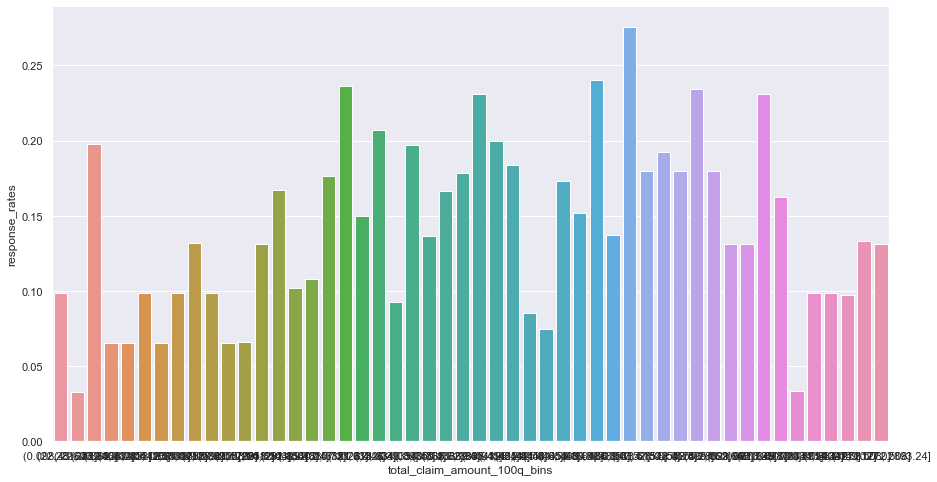

In [118]:
response_rates_by_claim_bins = marketing_customers.groupby("total_claim_amount_100q_bins")["response_positive"].sum()/marketing_customers.groupby("total_claim_amount_100q_bins")["response_valid"].sum()
response_rates_by_claim_bins = pd.DataFrame(response_rates_by_claim_bins, columns=['response_rates'])

sns.barplot(x=response_rates_by_claim_bins.index, y=response_rates_by_claim_bins.response_rates)

,total_claim_amount,total_claim_amount_10q_bins
0,384.811147,"(383.945, 453.6]"
1,1131.464935,"(773.434, 2893.24]"
2,566.472247,"(513.6, 599.062]"
3,529.881344,"(513.6, 599.062]"
4,138.130879,"(104.085, 212.799]"
...,...,...
9129,198.234764,"(104.085, 212.799]"
9130,379.200000,"(334.039, 383.945]"
9131,790.784983,"(773.434, 2893.24]"
9132,691.200000,"(599.062, 773.434]"


<AxesSubplot:xlabel='total_claim_amount_10q_bins', ylabel='response_rates'>

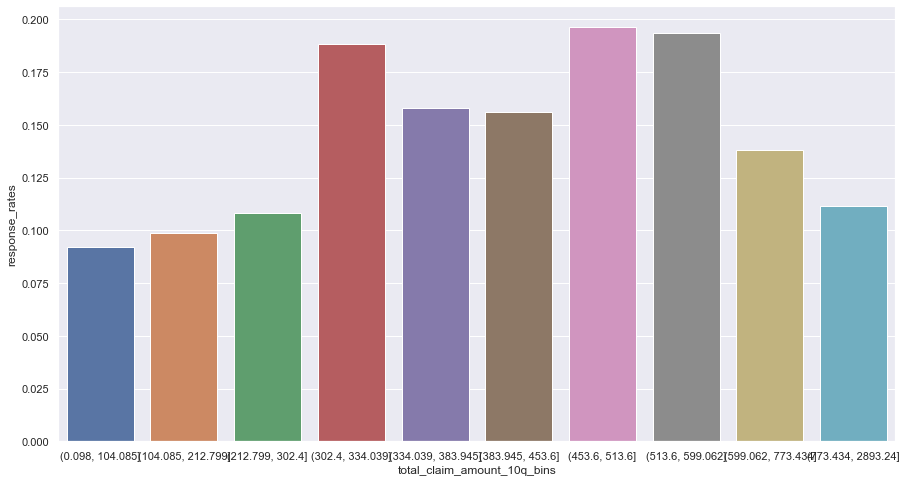

In [117]:
marketing_customers['total_claim_amount_10q_bins'] =  pd.qcut(marketing_customers['total_claim_amount'], 10)
display(marketing_customers[['total_claim_amount','total_claim_amount_10q_bins']])

response_rates_by_claim_bins = marketing_customers.groupby("total_claim_amount_10q_bins")["response_positive"].sum()/marketing_customers.groupby("total_claim_amount_10q_bins")["response_valid"].sum()
response_rates_by_claim_bins = pd.DataFrame(response_rates_by_claim_bins, columns=['response_rates'])

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=response_rates_by_claim_bins.index, y=response_rates_by_claim_bins.response_rates)

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

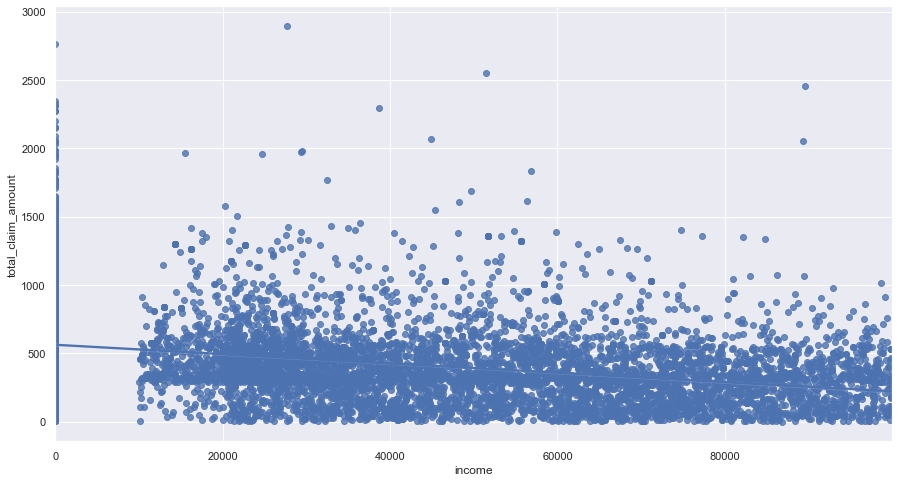

In [120]:
# playing with scatter plot
#sns.scatterplot(x=marketing_customers.income, y=marketing_customers.total_claim_amount)
sns.regplot(x="income", y="total_claim_amount", data=marketing_customers)

<AxesSubplot:xlabel='income_10q_bins', ylabel='response_rates'>

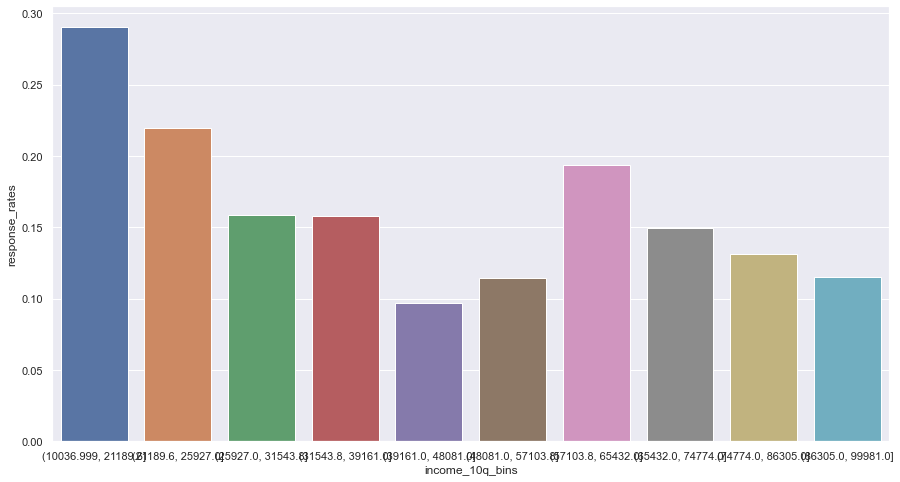

In [122]:
marketing_customers_with_income = marketing_customers[marketing_customers.income > 0]
marketing_customers_with_income['income_10q_bins'] =  pd.qcut(marketing_customers_with_income['income'], 10)

response_rates_by_income_bins = marketing_customers_with_income.groupby("income_10q_bins")["response_positive"].sum()/marketing_customers_with_income.groupby("income_10q_bins")["response_valid"].sum()
response_rates_by_income_bins = pd.DataFrame(response_rates_by_income_bins, columns=['response_rates'])

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=response_rates_by_income_bins.index, y=response_rates_by_income_bins.response_rates)